In [1]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt
from smplpytorch.pytorch.smpl_layer import SMPL_Layer
from display_utils import display_model

/home/lala/miniconda3/envs/smpltojoint/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
loaded_data = np.load("/home/lala/Documents/repos/WHAM/output/Lars.npz")

# Print all available keys
print("Keys in loaded data:", loaded_data.files)

# Print shapes of all stored arrays
for key in loaded_data.files:
    print(f"{key}: Shape {loaded_data[key].shape}")

Keys in loaded data: ['pose', 'trans', 'pose_world', 'trans_world', 'betas', 'verts', 'frame_ids']
pose: Shape (14921, 72)
trans: Shape (14921, 3)
pose_world: Shape (14921, 72)
trans_world: Shape (14921, 3)
betas: Shape (14921, 10)
verts: Shape (14921, 6890, 3)
frame_ids: Shape (14921,)


Saving figure at image.png.


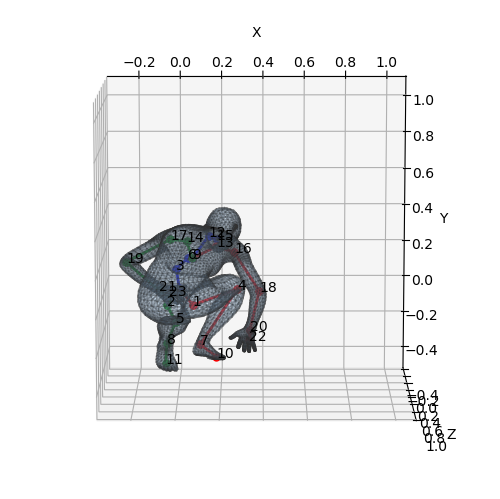

<Axes3DSubplot:xlabel='X', ylabel='Y'>

In [5]:
# Extract pose and shape parameters
pose_params = torch.tensor(loaded_data["pose"][:1], dtype=torch.float32)  # First frame
shape_params = torch.tensor(loaded_data["betas"][:1], dtype=torch.float32)  # First frame

# Use GPU if available
cuda = torch.cuda.is_available()
if cuda:
    pose_params = pose_params.cuda()
    shape_params = shape_params.cuda()

# Create the SMPL layer
smpl_layer = SMPL_Layer(
    center_idx=0,
    gender='neutral',
    model_root='smplpytorch/native/models'
)

if cuda:
    smpl_layer.cuda()

# Forward through SMPL to get vertices and joints
verts, Jtr = smpl_layer(pose_params, th_betas=shape_params)

verts[:, :, 1] *= -1  # Invert Y-axis
Jtr[:, :, 1] *= -1  # Invert Y-axis for joints


# Visualize with display_model
display_model(
    {'verts': verts.cpu().detach(),
     'joints': Jtr.cpu().detach()},
    model_faces=smpl_layer.th_faces,
    with_joints=True,
    kintree_table=smpl_layer.kintree_table,
    savepath='image.png',
    show=True
)